In [7]:
# Imports
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from shutil import copy
import tifffile

stitching images from one brain slice (e.g: data/processed/0) 

In [54]:
%pwd

'/Users/ding/vscode/stiching/scripts/scratch'

In [16]:
read_path = '../../data/processed/0'

In [17]:
Path(read_path).exists()

True

In [42]:
path_processed = list(Path(read_path).glob('*.tif'))
len(path_processed)

69

In [47]:
good_tiffs = [path for path in path_processed if '13056' in path.name]
good_tiffs

[PosixPath('../../data/processed/0/ExPW021_PW162-A05_Scan1_[13056,45566]_component_data.tif'),
 PosixPath('../../data/processed/0/ExPW021_PW162-A05_Scan1_[13056,47651]_component_data.tif'),
 PosixPath('../../data/processed/0/ExPW021_PW162-A05_Scan1_[13056,41397]_component_data.tif'),
 PosixPath('../../data/processed/0/ExPW021_PW162-A05_Scan1_[13056,44177]_component_data.tif'),
 PosixPath('../../data/processed/0/ExPW021_PW162-A05_Scan1_[13056,42787]_component_data.tif'),
 PosixPath('../../data/processed/0/ExPW021_PW162-A05_Scan1_[13056,46956]_component_data.tif'),
 PosixPath('../../data/processed/0/ExPW021_PW162-A05_Scan1_[13056,43482]_component_data.tif'),
 PosixPath('../../data/processed/0/ExPW021_PW162-A05_Scan1_[13056,40702]_component_data.tif'),
 PosixPath('../../data/processed/0/ExPW021_PW162-A05_Scan1_[13056,48346]_component_data.tif'),
 PosixPath('../../data/processed/0/ExPW021_PW162-A05_Scan1_[13056,44871]_component_data.tif'),
 PosixPath('../../data/processed/0/ExPW021_PW162-A

In [49]:
path = path_processed[0]
path

PosixPath('../../data/processed/0/ExPW021_PW162-A05_Scan1_[13056,45566]_component_data.tif')

In [46]:
'13056' in path.name

True

In [39]:
len(path_processed), path_processed[0:5]

(0, [])

In [60]:
def getimage_properties(filename):
    image_array = tifffile.imread(filename)
    coord_str = re.findall(r'\[(.*?)\]', str(filename))
    coord_split = coord_str[0].split(',')
    coord_int = np.array([int(coord_split[0]), int(coord_split[1]),image_array]) 
    return coord_int


In [69]:
column_names = ["x", "y", "image"]

df = pd.DataFrame(columns = column_names)

In [97]:
for filename in good_tiffs:
    data = getimage_properties(filename)
    data = pd.Series(data)
    df = df.append(data,ignore_index=True)
    #df = df.append(pd.DataFrame({"x":data[0],"y":data[1],"image":data[2]},index=[0]), ignore_index = True)
df

/Users/ding/miniconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


,x,y,image,0,1,2
0,NaN,NaN,NaN,13056.0,40702.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8478635, 0...."
1,NaN,NaN,NaN,13056.0,41397.0,"[[[5.055502, 2.4276266, 0.6416149, 0.17879266,..."
2,NaN,NaN,NaN,13056.0,42092.0,"[[[1.3647997, 2.315343, 3.5332587, 4.9153223, ..."
3,NaN,NaN,NaN,13056.0,42787.0,"[[[0.9765739, 1.096228, 1.0132359, 1.1945324, ..."
4,NaN,NaN,NaN,13056.0,43482.0,"[[[1.6698916, 0.74015874, 0.8546914, 0.8881223..."
5,NaN,NaN,NaN,13056.0,44177.0,"[[[36.05462, 35.283318, 36.819767, 36.92394, 3..."
6,NaN,NaN,NaN,13056.0,44871.0,"[[[1.1665195, 1.1277035, 0.33260176, 1.5191237..."
7,NaN,NaN,NaN,13056.0,45566.0,"[[[0.0, 1.6325271, 0.939, 1.5543305, 0.7877930..."
8,NaN,NaN,NaN,13056.0,46261.0,"[[[103.018135, 95.7538, 74.014565, 58.963215, ..."
9,NaN,NaN,NaN,13056.0,46956.0,"[[[31.60433, 54.544884, 67.7315, 91.52586, 104..."


In [72]:
len(df),len(good_tiffs)

(12, 12)

In [74]:
df = df.sort_values(by =1)

In [75]:
df

,x,y,image,0,1,2
7,NaN,NaN,NaN,13056.0,40702.0,"[[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8478635, 0...."
2,NaN,NaN,NaN,13056.0,41397.0,"[[[5.055502, 2.4276266, 0.6416149, 0.17879266,..."
10,NaN,NaN,NaN,13056.0,42092.0,"[[[1.3647997, 2.315343, 3.5332587, 4.9153223, ..."
4,NaN,NaN,NaN,13056.0,42787.0,"[[[0.9765739, 1.096228, 1.0132359, 1.1945324, ..."
6,NaN,NaN,NaN,13056.0,43482.0,"[[[1.6698916, 0.74015874, 0.8546914, 0.8881223..."
3,NaN,NaN,NaN,13056.0,44177.0,"[[[36.05462, 35.283318, 36.819767, 36.92394, 3..."
9,NaN,NaN,NaN,13056.0,44871.0,"[[[1.1665195, 1.1277035, 0.33260176, 1.5191237..."
0,NaN,NaN,NaN,13056.0,45566.0,"[[[0.0, 1.6325271, 0.939, 1.5543305, 0.7877930..."
11,NaN,NaN,NaN,13056.0,46261.0,"[[[103.018135, 95.7538, 74.014565, 58.963215, ..."
5,NaN,NaN,NaN,13056.0,46956.0,"[[[31.60433, 54.544884, 67.7315, 91.52586, 104..."


In [81]:
df[2][5].shape,df[2][7].shape

((1, 1396, 1860), (1, 1396, 1860))

In [83]:
camps = np.empty((1396,12*1860))

In [84]:
camps.shape

(1396, 22320)

In [85]:
start = 0
end = 1860
intv = 1860
for image in df[2]:
    im = image[0]
    camps[:,start:end] = im
    start += intv
    end += intv

In [86]:
camps.shape

(1396, 22320)

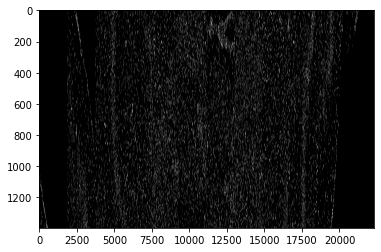

In [91]:
plt.imshow(camps,aspect='auto',cmap = "gray")